In [ ]:
df = spark.read.csv('/FileStore/tables/fraud_detection_data.csv', header=True, inferSchema=True)
df.show()
df.printSchema()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
step| type| amount| nameOrig|oldbalanceOrg|newbalanceOrig| nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
 1| PAYMENT| 9839.64|C1231006815| 170136.0| 160296.36|M1979787155| 0.0| 0.0| 0| 0|
 1| PAYMENT| 1864.28|C1666544295| 21249.0| 19384.72|M2044282225| 0.0| 0.0| 0| 0|
 1|TRANSFER| 181.0|C1305486145| 181.0| 0.0| C553264065| 0.0| 0.0| 1| 0|
 1|CASH_OUT| 181.0| C840083671| 181.0| 0.0| C38997010| 21182.0| 0.0| 1| 0|
 1| PAYMENT| 11668.14|C2048537720| 41554.0| 29885.86|M1230701703| 0.0| 0.0| 0| 0|
 1| PAYMENT| 7817.71| C90045638| 53860.0| 46042.29| M573487274| 0.0| 0.0| 0| 0|
 1| PAYMENT| 7107.77| C154988899| 183195.0| 176087.23| M408069119| 0.0| 0.0| 0| 0|
 1| PAYMENT| 7861.64|C1912850431| 176087.23| 168225.59| M633326333| 0.0| 0.0| 0| 0|
 1| PAYMENT| 4024.36|C1265012928| 2671.0| 0.0|M1176932104| 0.0| 0.0| 0| 0|
 1| DEBIT| 5337.77| C712410124| 41720.0| 36382.23| C195600860| 41898.0| 40348.79| 0| 0|
 1| DEBIT| 9644.94|C1900366749| 4465.0| 0.0| C997608398| 10845.0| 157982.12| 0| 0|
 1| PAYMENT| 3099.97| C249177573| 20771.0| 17671.03|M2096539129| 0.0| 0.0| 0| 0|
 1| PAYMENT| 2560.74|C1648232591| 5070.0| 2509.26| M972865270| 0.0| 0.0| 0| 0|
 1| PAYMENT| 11633.76|C1716932897| 10127.0| 0.0| M801569151| 0.0| 0.0| 0| 0|
 1| PAYMENT| 4098.78|C1026483832| 503264.0| 499165.22|M1635378213| 0.0| 0.0| 0| 0|
 1|CASH_OUT|229133.94| C905080434| 15325.0| 0.0| C476402209| 5083.0| 51513.44| 0| 0|
 1| PAYMENT| 1563.82| C761750706| 450.0| 0.0|M1731217984| 0.0| 0.0| 0| 0|
 1| PAYMENT| 1157.86|C1237762639| 21156.0| 19998.14|M1877062907| 0.0| 0.0| 0| 0|
 1| PAYMENT| 671.64|C2033524545| 15123.0| 14451.36| M473053293| 0.0| 0.0| 0| 0|
 1|TRANSFER| 215310.3|C1670993182| 705.0| 0.0|C1100439041| 22425.0| 0.0| 0| 0|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
only showing top 20 rows

root
-- step: integer (nullable = true)
-- type: string (nullable = true)
-- amount: double (nullable = true)
-- nameOrig: string (nullable = true)
-- oldbalanceOrg: double (nullable = true)
-- newbalanceOrig: double (nullable = true)
-- nameDest: string (nullable = true)
-- oldbalanceDest: double (nullable = true)
-- newbalanceDest: double (nullable = true)
-- isFraud: integer (nullable = true)
-- isFlaggedFraud: integer (nullable = true)

In [ ]:
df.createOrReplaceTempView('fraud_detection')

df = spark.sql("SELECT step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest FROM fraud_detection")
df.show()
df.printSchema()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+
step| type| amount| nameOrig|oldbalanceOrg|newbalanceOrig| nameDest|oldbalanceDest|newbalanceDest|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+
 1| PAYMENT| 9839.64|C1231006815| 170136.0| 160296.36|M1979787155| 0.0| 0.0|
 1| PAYMENT| 1864.28|C1666544295| 21249.0| 19384.72|M2044282225| 0.0| 0.0|
 1|TRANSFER| 181.0|C1305486145| 181.0| 0.0| C553264065| 0.0| 0.0|
 1|CASH_OUT| 181.0| C840083671| 181.0| 0.0| C38997010| 21182.0| 0.0|
 1| PAYMENT| 11668.14|C2048537720| 41554.0| 29885.86|M1230701703| 0.0| 0.0|
 1| PAYMENT| 7817.71| C90045638| 53860.0| 46042.29| M573487274| 0.0| 0.0|
 1| PAYMENT| 7107.77| C154988899| 183195.0| 176087.23| M408069119| 0.0| 0.0|
 1| PAYMENT| 7861.64|C1912850431| 176087.23| 168225.59| M633326333| 0.0| 0.0|
 1| PAYMENT| 4024.36|C1265012928| 2671.0| 0.0|M1176932104| 0.0| 0.0|
 1| DEBIT| 5337.77| C712410124| 41720.0| 36382.23| C195600860| 41898.0| 40348.79|
 1| DEBIT| 9644.94|C1900366749| 4465.0| 0.0| C997608398| 10845.0| 157982.12|
 1| PAYMENT| 3099.97| C249177573| 20771.0| 17671.03|M2096539129| 0.0| 0.0|
 1| PAYMENT| 2560.74|C1648232591| 5070.0| 2509.26| M972865270| 0.0| 0.0|
 1| PAYMENT| 11633.76|C1716932897| 10127.0| 0.0| M801569151| 0.0| 0.0|
 1| PAYMENT| 4098.78|C1026483832| 503264.0| 499165.22|M1635378213| 0.0| 0.0|
 1|CASH_OUT|229133.94| C905080434| 15325.0| 0.0| C476402209| 5083.0| 51513.44|
 1| PAYMENT| 1563.82| C761750706| 450.0| 0.0|M1731217984| 0.0| 0.0|
 1| PAYMENT| 1157.86|C1237762639| 21156.0| 19998.14|M1877062907| 0.0| 0.0|
 1| PAYMENT| 671.64|C2033524545| 15123.0| 14451.36| M473053293| 0.0| 0.0|
 1|TRANSFER| 215310.3|C1670993182| 705.0| 0.0|C1100439041| 22425.0| 0.0|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+
only showing top 20 rows

root
-- step: integer (nullable = true)
-- type: string (nullable = true)
-- amount: double (nullable = true)
-- nameOrig: string (nullable = true)
-- oldbalanceOrg: double (nullable = true)
-- newbalanceOrig: double (nullable = true)
-- nameDest: string (nullable = true)
-- oldbalanceDest: double (nullable = true)
-- newbalanceDest: double (nullable = true)

In [ ]:
df = df.withColumn("orgDiff", df.newbalanceOrig - df.oldbalanceOrg).withColumn("destDiff", df.newbalanceDest - df.oldbalanceDest)
df.show()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------------------+-------------------+
step| type| amount| nameOrig|oldbalanceOrg|newbalanceOrig| nameDest|oldbalanceDest|newbalanceDest| orgDiff| destDiff|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------------------+-------------------+
 1| PAYMENT| 9839.64|C1231006815| 170136.0| 160296.36|M1979787155| 0.0| 0.0| -9839.640000000014| 0.0|
 1| PAYMENT| 1864.28|C1666544295| 21249.0| 19384.72|M2044282225| 0.0| 0.0|-1864.2799999999988| 0.0|
 1|TRANSFER| 181.0|C1305486145| 181.0| 0.0| C553264065| 0.0| 0.0| -181.0| 0.0|
 1|CASH_OUT| 181.0| C840083671| 181.0| 0.0| C38997010| 21182.0| 0.0| -181.0| -21182.0|
 1| PAYMENT| 11668.14|C2048537720| 41554.0| 29885.86|M1230701703| 0.0| 0.0| -11668.14| 0.0|
 1| PAYMENT| 7817.71| C90045638| 53860.0| 46042.29| M573487274| 0.0| 0.0| -7817.709999999999| 0.0|
 1| PAYMENT| 7107.77| C154988899| 183195.0| 176087.23| M408069119| 0.0| 0.0|-7107.7699999999895| 0.0|
 1| PAYMENT| 7861.64|C1912850431| 176087.23| 168225.59| M633326333| 0.0| 0.0| -7861.640000000014| 0.0|
 1| PAYMENT| 4024.36|C1265012928| 2671.0| 0.0|M1176932104| 0.0| 0.0| -2671.0| 0.0|
 1| DEBIT| 5337.77| C712410124| 41720.0| 36382.23| C195600860| 41898.0| 40348.79| -5337.769999999997|-1549.2099999999991|
 1| DEBIT| 9644.94|C1900366749| 4465.0| 0.0| C997608398| 10845.0| 157982.12| -4465.0| 147137.12|
 1| PAYMENT| 3099.97| C249177573| 20771.0| 17671.03|M2096539129| 0.0| 0.0| -3099.970000000001| 0.0|
 1| PAYMENT| 2560.74|C1648232591| 5070.0| 2509.26| M972865270| 0.0| 0.0| -2560.74| 0.0|
 1| PAYMENT| 11633.76|C1716932897| 10127.0| 0.0| M801569151| 0.0| 0.0| -10127.0| 0.0|
 1| PAYMENT| 4098.78|C1026483832| 503264.0| 499165.22|M1635378213| 0.0| 0.0| -4098.780000000028| 0.0|
 1|CASH_OUT|229133.94| C905080434| 15325.0| 0.0| C476402209| 5083.0| 51513.44| -15325.0| 46430.44|
 1| PAYMENT| 1563.82| C761750706| 450.0| 0.0|M1731217984| 0.0| 0.0| -450.0| 0.0|
 1| PAYMENT| 1157.86|C1237762639| 21156.0| 19998.14|M1877062907| 0.0| 0.0|-1157.8600000000006| 0.0|
 1| PAYMENT| 671.64|C2033524545| 15123.0| 14451.36| M473053293| 0.0| 0.0| -671.6399999999994| 0.0|
 1|TRANSFER| 215310.3|C1670993182| 705.0| 0.0|C1100439041| 22425.0| 0.0| -705.0| -22425.0|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------------------+-------------------+
only showing top 20 rows

In [ ]:
df.createOrReplaceTempView("financials")
df.show()

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------------------+-------------------+
step| type| amount| nameOrig|oldbalanceOrg|newbalanceOrig| nameDest|oldbalanceDest|newbalanceDest| orgDiff| destDiff|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------------------+-------------------+
 1| PAYMENT| 9839.64|C1231006815| 170136.0| 160296.36|M1979787155| 0.0| 0.0| -9839.640000000014| 0.0|
 1| PAYMENT| 1864.28|C1666544295| 21249.0| 19384.72|M2044282225| 0.0| 0.0|-1864.2799999999988| 0.0|
 1|TRANSFER| 181.0|C1305486145| 181.0| 0.0| C553264065| 0.0| 0.0| -181.0| 0.0|
 1|CASH_OUT| 181.0| C840083671| 181.0| 0.0| C38997010| 21182.0| 0.0| -181.0| -21182.0|
 1| PAYMENT| 11668.14|C2048537720| 41554.0| 29885.86|M1230701703| 0.0| 0.0| -11668.14| 0.0|
 1| PAYMENT| 7817.71| C90045638| 53860.0| 46042.29| M573487274| 0.0| 0.0| -7817.709999999999| 0.0|
 1| PAYMENT| 7107.77| C154988899| 183195.0| 176087.23| M408069119| 0.0| 0.0|-7107.7699999999895| 0.0|
 1| PAYMENT| 7861.64|C1912850431| 176087.23| 168225.59| M633326333| 0.0| 0.0| -7861.640000000014| 0.0|
 1| PAYMENT| 4024.36|C1265012928| 2671.0| 0.0|M1176932104| 0.0| 0.0| -2671.0| 0.0|
 1| DEBIT| 5337.77| C712410124| 41720.0| 36382.23| C195600860| 41898.0| 40348.79| -5337.769999999997|-1549.2099999999991|
 1| DEBIT| 9644.94|C1900366749| 4465.0| 0.0| C997608398| 10845.0| 157982.12| -4465.0| 147137.12|
 1| PAYMENT| 3099.97| C249177573| 20771.0| 17671.03|M2096539129| 0.0| 0.0| -3099.970000000001| 0.0|
 1| PAYMENT| 2560.74|C1648232591| 5070.0| 2509.26| M972865270| 0.0| 0.0| -2560.74| 0.0|
 1| PAYMENT| 11633.76|C1716932897| 10127.0| 0.0| M801569151| 0.0| 0.0| -10127.0| 0.0|
 1| PAYMENT| 4098.78|C1026483832| 503264.0| 499165.22|M1635378213| 0.0| 0.0| -4098.780000000028| 0.0|
 1|CASH_OUT|229133.94| C905080434| 15325.0| 0.0| C476402209| 5083.0| 51513.44| -15325.0| 46430.44|
 1| PAYMENT| 1563.82| C761750706| 450.0| 0.0|M1731217984| 0.0| 0.0| -450.0| 0.0|
 1| PAYMENT| 1157.86|C1237762639| 21156.0| 19998.14|M1877062907| 0.0| 0.0|-1157.8600000000006| 0.0|
 1| PAYMENT| 671.64|C2033524545| 15123.0| 14451.36| M473053293| 0.0| 0.0| -671.6399999999994| 0.0|
 1|TRANSFER| 215310.3|C1670993182| 705.0| 0.0|C1100439041| 22425.0| 0.0| -705.0| -22425.0|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------------------+-------------------+
only showing top 20 rows

In [ ]:
%sql
select type, count(1) from financials group by type

type,count(1)
TRANSFER,3809
CASH_IN,7375
CASH_OUT,10138
PAYMENT,18694
DEBIT,583


In [ ]:
%sql
select type, sum(amount) from financials group by type

type,sum(amount)
TRANSFER,2.731041314630002E9
CASH_IN,1.2357060494100006E9
CASH_OUT,1.8403587754399922E9
PAYMENT,1.7195831150000018E8
DEBIT,2130479.3699999982


In [ ]:
from pyspark.sql import functions as F

df = df.withColumn("label", F.when( ( (df.oldbalanceOrg <= 56900) &
(df.type == "TRANSFER") & (df.newbalanceDest <= 105)) | (
(df.oldbalanceOrg > 56900) & (df.newbalanceOrig <= 12)) | (
(df.oldbalanceOrg > 56900) & (df.newbalanceOrig > 12) & (df.amount
> 1160000) ), 1 ).otherwise(0))

In [ ]:
# Calculate proportions
fraud_cases = df.filter(df.label == 1).count()
total_cases = df.count()
fraud_pct = 1.*fraud_cases/total_cases

# Provide quick statistics
print("Based on these rules, we have flagged %s (%s) fraud cases out of a total of %s cases." % (fraud_cases, fraud_pct, total_cases))

# Create temporary view to review data
df.createOrReplaceTempView("financials_labeled")

Based on these rules, we have flagged 1394 (0.03433582107933693) fraud cases out of a total of 40599 cases.

In [ ]:
%sql
select label, count(1) as `Transactions`, sum(amount) as `Total Amount` from financials_labeled group by label

label,Transactions,Total Amount
1,1394,8.0111757614E8
0,39205,5.180077354209961E9


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier

# Split our dataset between training and test datasets
(train, test) = df.randomSplit([0.7, 0.3], seed=12345)

# Encodes a string column of labels to a column of label indices
indexer = StringIndexer(inputCol = "type", outputCol = "typeIndexed")

# VectorAssembler is a transformer that combines a given list of columns into a single vector column
va = VectorAssembler(inputCols = ["typeIndexed", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", 
                                  "newbalanceDest", "orgDiff", "destDiff"], outputCol = "features")

# Using the DecisionTree classifier model
dt = DecisionTreeClassifier(labelCol = "label", featuresCol = "features", seed = 54321, maxDepth = 5)

#Create our pipeline stages
pipeline = Pipeline(stages=[indexer, va, dt])

# View the Decision Tree model (prior to CrossValidator)
dt_model = pipeline.fit(train)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Use BinaryClassificationEvaluator to evaluate our model
evaluatorPR = BinaryClassificationEvaluator(labelCol = "label", rawPredictionCol = "prediction", metricName = "areaUnderPR")
evaluatorAUC = BinaryClassificationEvaluator(labelCol = "label", rawPredictionCol = "prediction", metricName = "areaUnderROC")

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
# Build the grid of different parameters
paramGrid = ParamGridBuilder() \
  .addGrid(dt.maxDepth, [5, 10, 15]) \
  .addGrid(dt.maxBins, [10, 20, 30]) \
  .build()

# Build out the cross validation
crossval = CrossValidator(estimator = dt, estimatorParamMaps = paramGrid, evaluator = evaluatorPR, numFolds = 3)

# Build the CV pipeline 
pipelineCV = Pipeline(stages=[indexer, va, crossval])

# Train the model using the pipeline, parameter grid, and preceding BinaryClassificationEvaluator
cvModel_u = pipelineCV.fit(train)

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [ ]:
# Build the best model (training and test datasets)
train_pred = cvModel_u.transform(train)
test_pred = cvModel_u.transform(test)

# Evaluate the model on training datasets
pr_train = evaluatorPR.evaluate(train_pred)
auc_train = evaluatorAUC.evaluate(train_pred)

# Evaluate the model on test datasets
pr_test = evaluatorPR.evaluate(test_pred)
auc_test = evaluatorAUC.evaluate(test_pred)

# Print out the PR and AUC values
print("PR train:", pr_train)
print("AUC train:", auc_train)
print("PR test:", pr_test)
print("AUC test:", auc_test)

PR train: 0.9969115678402499
AUC train: 0.9978764813380708
PR test: 0.9934879414487897
AUC test: 0.9932432432432432

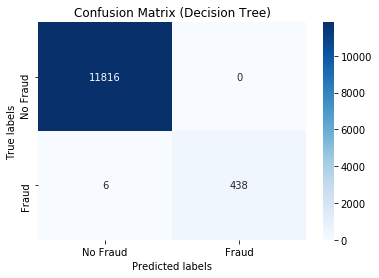

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix

y_true = test_pred.select(['label']).collect()
y_pred = test_pred.select(['prediction']).collect()

cm = confusion_matrix(y_true, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Decision Tree)')
ax.xaxis.set_ticklabels(['No Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['No Fraud', 'Fraud'])

plt.show()

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier

# Split our dataset between training and test datasets
(train, test) = df.randomSplit([0.7, 0.3], seed=12345)

# Encodes a string column of labels to a column of label indices
indexer = StringIndexer(inputCol = "type", outputCol = "typeIndexed")

# VectorAssembler is a transformer that combines a given list of columns into a single vector column
va = VectorAssembler(inputCols = ["typeIndexed", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", 
                                  "newbalanceDest", "orgDiff", "destDiff"], outputCol = "features")

# Using the Random Forest classifier model
rf = RandomForestClassifier(labelCol = "label", featuresCol = "features", seed = 54321, maxDepth = 5)

#Create our pipeline stages
pipeline = Pipeline(stages=[indexer, va, rf])

# View the Random Forest model (prior to CrossValidator)
rf_model = pipeline.fit(train)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Use BinaryClassificationEvaluator to evaluate our model
evaluatorPR = BinaryClassificationEvaluator(labelCol = "label", rawPredictionCol = "prediction", metricName = "areaUnderPR")
evaluatorAUC = BinaryClassificationEvaluator(labelCol = "label", rawPredictionCol = "prediction", metricName = "areaUnderROC")

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
# Build the grid of different parameters
paramGrid = ParamGridBuilder() \
  .addGrid(rf.numTrees, [5, 10, 15]) \
  .addGrid(rf.maxDepth, [5, 10, 15]) \
  .build()

# Build out the cross validation
crossval = CrossValidator(estimator = rf, estimatorParamMaps = paramGrid, evaluator = evaluatorPR, numFolds = 3)

# Build the CV pipeline 
pipelineCV = Pipeline(stages=[indexer, va, crossval])

# Train the model using the pipeline, parameter grid, and preceding BinaryClassificationEvaluator
cvModel_u = pipelineCV.fit(train)

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [ ]:
# Build the best model (training and test datasets)
train_pred = cvModel_u.transform(train)
test_pred = cvModel_u.transform(test)

# Evaluate the model on training datasets
pr_train = evaluatorPR.evaluate(train_pred)
auc_train = evaluatorAUC.evaluate(train_pred)

# Evaluate the model on test datasets
pr_test = evaluatorPR.evaluate(test_pred)
auc_test = evaluatorAUC.evaluate(test_pred)

# Print out the PR and AUC values
print("PR train:", pr_train)
print("AUC train:", auc_train)
print("PR test:", pr_test)
print("AUC test:", auc_test)

PR train: 0.9649215360182045
AUC train: 0.9988529970733544
PR test: 0.9584837742860323
AUC test: 0.9925661951728302

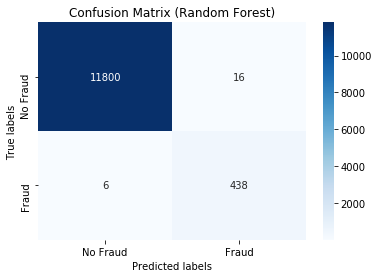

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix

y_true = test_pred.select(['label']).collect()
y_pred = test_pred.select(['prediction']).collect()

cm = confusion_matrix(y_true, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Random Forest)')
ax.xaxis.set_ticklabels(['No Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['No Fraud', 'Fraud'])

plt.show()